In [1]:

import json
import requests

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.metrics import mean_squared_error

In [2]:

endpoint = 'https://min-api.cryptocompare.com/data/histoday'
res = requests.get(endpoint + '?fsym=BTC&tsym=USD&limit=2000')
hist = pd.DataFrame(json.loads(res.content)['Data'])
hist = hist.set_index('time')
hist.index = pd.to_datetime(hist.index, unit='s')
target_col = 'close'

In [3]:
hist.head()

,high,low,open,volumefrom,volumeto,close,conversionType,conversionSymbol
time,,,,,,,,
2016-04-11,422.35,418.11,420.25,36387.29,15374195.04,421.43,direct,
2016-04-12,426.69,420.70,421.43,57711.94,24580503.64,424.74,direct,
2016-04-13,426.58,421.41,424.74,38088.60,16183793.93,423.47,direct,
2016-04-14,425.44,421.84,423.47,30664.40,13038970.54,424.02,direct,
2016-04-15,429.49,423.25,424.02,54119.98,23214560.10,428.67,direct,


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

In [5]:
df = pd.DataFrame(hist['close'])
df.tail()

,close
time,
2021-09-28,41056.79
2021-09-29,41539.43
2021-09-30,43829.34
2021-10-01,48164.35
2021-10-02,47799.23


In [6]:
pred = 5
df['Prediction'] = df['close'].shift(-pred) #adding the pred value to the dataframe
df.tail(10)

,close,Prediction
time,,
2021-09-23,44893.87,41056.79
2021-09-24,42848.41,41539.43
2021-09-25,42721.91,43829.34
2021-09-26,43201.79,48164.35
2021-09-27,42187.51,47799.23
2021-09-28,41056.79,NaN
2021-09-29,41539.43,NaN
2021-09-30,43829.34,NaN
2021-10-01,48164.35,NaN


In [7]:
x = np.array(df.drop(['Prediction'],1)) #Drop the prediction column and convert the dataframe into array 
x = x[:len(df)-pred] #Removing last 'n' rows
print(x)

[[  421.43]
 [  424.74]
 [  423.47]
 ...
 [42721.91]
 [43201.79]
 [42187.51]]


In [8]:
y = np.array(df['Prediction'])
y = y[:-pred] #Removing last 'n' rows
print(y)

[  430.05   426.26   427.69 ... 43829.34 48164.35 47799.23]


In [9]:
                         
def train_test_split(df, test_size=0.2):
    split_row = len(df) - int(test_size * len(df))
    train_data = df.iloc[:split_row]
    test_data = df.iloc[split_row:]
    return train_data, test_data



In [10]:
x = pd.DataFrame(x)
x_train, x_test = train_test_split(x, test_size=0.2)


In [11]:
y = pd.DataFrame(y)
y_train, y_test = train_test_split(y, test_size=0.2)

In [43]:
# setup regressor
svr_lin_1 = SVR(kernel='linear') 
# performance a grid search
grid = GridSearchCV(
    svr_lin_1,   
    {
        'C': [0.1,1, 10, 100, 1000]
    },   
    cv = 3,   
    verbose = 1,
    n_jobs = -1,  
    scoring = 'neg_median_absolute_error')
grid.fit(x_train,y_train)
print('Best: %f using %s'%(grid.best_score_, grid.best_params_))

Fitting 3 folds for each of 5 candidates, totalling 15 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Best: -254.228094 using {'C': 10}


In [12]:
from math import sqrt

svr_lin = SVR(kernel = 'linear',C=10)
svr_lin.fit(x_train, y_train)
y_pre = svr_lin.predict(x_test)

'''print('R-squared  score(train) : {:.3f}'
     .format(svr_rbf.score(xtrain,ytrain)))
print('R-squared  score(train) : {:.3f}'
     .format(svr_rbf.score(xtest,ytest)))'''
#print('MSE for train data set :', metrics.mean_squared_error(ytrain, svr_rbf.predict(xtrain)))
#print('MSE for test data set :', metrics.mean_squared_error(ytest, svr_rbf.predict(xtest)))

rms = sqrt(mean_squared_error(y_test, y_pre))
print(rms)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


3638.8300709685795


In [13]:
from math import sqrt

svr_pol = SVR(kernel = 'poly')
svr_pol.fit(x_train, y_train)
y_pre1 = svr_pol.predict(x_test)



rms1 = sqrt(mean_squared_error(y_test, y_pre1))
print(rms1)

551974.596344655


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [14]:
from math import sqrt

svr_rbf = SVR(kernel = 'rbf')
svr_rbf.fit(x_train, y_train)
y_pre2 = svr_rbf.predict(x_test)

'''print('R-squared  score(train) : {:.3f}'
     .format(svr_rbf.score(xtrain,ytrain)))
print('R-squared  score(train) : {:.3f}'
     .format(svr_rbf.score(xtest,ytest)))'''
#print('MSE for train data set :', metrics.mean_squared_error(ytrain, svr_rbf.predict(xtrain)))
#print('MSE for test data set :', metrics.mean_squared_error(ytest, svr_rbf.predict(xtest)))

rms2 = sqrt(mean_squared_error(y_test, y_pre2))
print(rms2)

33253.447443401434


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


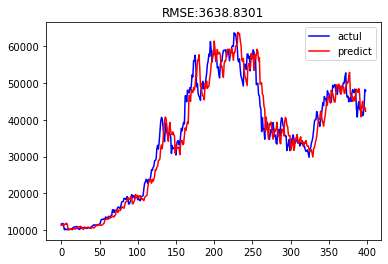

In [16]:
y_test1 = np.array(y_test)
y_pre1 = np.array(y_pre)
plt.plot(y_test1,color='blue',label='actul')
plt.plot(y_pre1,color='red',label='predict')
plt.legend(loc='best')
plt.title('RMSE:%.4f' % rms)
plt.show()

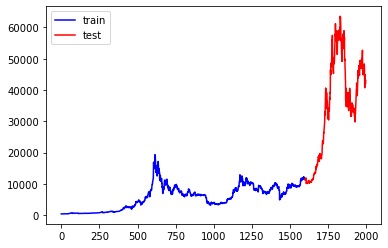

In [15]:
plt.plot(x_train,color='blue',label='train')
plt.plot(x_test,color='red',label='test')
plt.legend(loc='best')